In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import time
import pickle
# set image size to default
plt.rcParams['figure.figsize']=(19,5)

import patsy
%matplotlib inline
plt.style.use('seaborn')

In [14]:
%time
df = pd.read_csv('Taxi_Trips_NearSouth_Updated.csv')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [15]:
df.shape

(2204222, 18)

In [18]:
df.head(5)

,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,01/01/2013 12:00:00 AM,360.0,2.3,33,7.85,0.0,0.0,2.0,9.85,41.859350,-87.617358,41.884987,-87.620993
1,01/01/2013 12:00:00 AM,480.0,0.0,33,7.65,1.0,0.0,1.0,9.65,41.859350,-87.617358,41.880994,-87.632746
2,01/01/2013 12:00:00 AM,1200.0,3.7,33,13.45,0.0,0.0,1.5,14.95,41.859350,-87.617358,41.898332,-87.620763
3,01/01/2013 12:00:00 AM,60.0,0.3,33,3.65,0.0,0.0,1.0,4.65,41.859350,-87.617358,41.859350,-87.617358
4,01/01/2013 12:00:00 AM,900.0,0.0,33,10.65,0.0,0.0,2.0,12.65,41.857184,-87.620335,41.899602,-87.633308


In [17]:
df = df.drop(['Trip ID','Taxi ID','Trip End Timestamp','Dropoff Community Area','Payment Type'],axis=1)

In [19]:
%time
# Change datetime format for trip start and remove original timestamp 
df['Trip_Start'] = pd.to_datetime(df['Trip Start Timestamp'])
df.drop('Trip Start Timestamp',axis=1, inplace=True)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [20]:
dfn = df.copy()

In [21]:
# pickle the dataframe to review for later
dfn.to_pickle('NearSouth_DataFrame.pkl')

In [22]:
dfn['month'] = dfn.Trip_Start.dt.month
dfn['time'] = dfn.Trip_Start.dt.time
dfn['day']=dfn.Trip_Start.dt.dayofweek
dfn['date']=dfn.Trip_Start.dt.date

In [23]:
dfn = dfn.drop(['Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude',
                'Dropoff Centroid Longitude', 'Pickup Community Area'],axis=1)

In [31]:
dfn.head(5)

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Trip_Start,time,date,Day,season
0,360.0,2.3,7.85,0.0,0.0,2.0,9.85,2013-01-01,00:00:00,2013-01-01,Tuesday,Winter
1,480.0,0.0,7.65,1.0,0.0,1.0,9.65,2013-01-01,00:00:00,2013-01-01,Tuesday,Winter
2,1200.0,3.7,13.45,0.0,0.0,1.5,14.95,2013-01-01,00:00:00,2013-01-01,Tuesday,Winter
3,60.0,0.3,3.65,0.0,0.0,1.0,4.65,2013-01-01,00:00:00,2013-01-01,Tuesday,Winter
4,900.0,0.0,10.65,0.0,0.0,2.0,12.65,2013-01-01,00:00:00,2013-01-01,Tuesday,Winter


In [32]:
dfn.shape

(2204222, 12)

In [25]:
# Create a Day column
def day_convert(row):
    if row['day'] == 0:
        val = 'Monday'
    elif row['day'] == 1:
        val = 'Tuesday'
    elif row['day'] == 2:
        val = 'Wednesday'
    elif row['day'] == 3:
        val = 'Thursday'
    elif row['day'] == 4:
        val = 'Friday'
    elif row['day'] == 5:
        val = 'Saturday'
    else:
        val = 'Sunday'
    return val
dfn['Day'] = dfn.apply(day_convert, axis=1)

dfn.drop('day', axis=1, inplace=True)

In [26]:
# create a season column
def f(row):
    if row['month'] in (12, 1, 2):
        val = 'Winter'
    elif row['month'] in [3,4,5]:
        val = 'Spring'
    elif row['month'] in [6,7,8]:
        val = 'Summer'
    else:
        val = 'Fall'
    return val

dfn['season'] = dfn.apply(f, axis=1)

dfn.drop('month', axis=1, inplace=True)

In [44]:
gcol = ['Trip_Start']
df_analysis = dfn.groupby(gcol).aggregate({
    'Trip Miles':'count',
    'Trip Total':'mean',
    'Trip Seconds': 'mean'
}).reset_index()

In [48]:
df_analysis.head(5)

,Trip_Start,Trip Miles,Trip Total,Trip Seconds,month,day
0,2013-01-01 00:00:00,10,10.665000,396.000000,1,1
1,2013-01-01 00:15:00,20,11.174500,630.000000,1,1
2,2013-01-01 00:30:00,11,11.704545,654.545455,1,1
3,2013-01-01 00:45:00,15,548.032667,648.000000,1,1
4,2013-01-01 01:00:00,18,11.732778,690.000000,1,1


In [38]:
#df_analysis.set_index('Trip_Start',inplace=True)

In [46]:
import datetime as dt

In [47]:
df_analysis['month'] = df_analysis.Trip_Start.dt.month
df_analysis['day']=df_analysis.Trip_Start.dt.dayofweek

In [68]:
df_analysis.rename(columns={'Trip Miles':'Count_Trips'},inplace=True)

In [49]:
# Create a Day column
def day_convert(row):
    if row['day'] == 0:
        val = 'Monday'
    elif row['day'] == 1:
        val = 'Tuesday'
    elif row['day'] == 2:
        val = 'Wednesday'
    elif row['day'] == 3:
        val = 'Thursday'
    elif row['day'] == 4:
        val = 'Friday'
    elif row['day'] == 5:
        val = 'Saturday'
    else:
        val = 'Sunday'
    return val
df_analysis['Day'] = df_analysis.apply(day_convert, axis=1)

df_analysis.drop('day', axis=1, inplace=True)

# create a season column
def f(row):
    if row['month'] in (12, 1, 2):
        val = 'Winter'
    elif row['month'] in [3,4,5]:
        val = 'Spring'
    elif row['month'] in [6,7,8]:
        val = 'Summer'
    else:
        val = 'Fall'
    return val

df_analysis['season'] = df_analysis.apply(f, axis=1)

df_analysis.drop('month', axis=1, inplace=True)

In [51]:
df_analysis.shape

(147414, 6)

In [60]:
df_analysis1.head(5)

,Trip_Start,Trip Miles,Trip Total,Trip Seconds,Day,season,season[T.Spring],season[T.Summer],season[T.Winter]
0,2013-01-01 00:00:00,10,10.665000,396.000000,Tuesday,Winter,0.0,0.0,1.0
1,2013-01-01 00:15:00,20,11.174500,630.000000,Tuesday,Winter,0.0,0.0,1.0
2,2013-01-01 00:30:00,11,11.704545,654.545455,Tuesday,Winter,0.0,0.0,1.0
3,2013-01-01 00:45:00,15,548.032667,648.000000,Tuesday,Winter,0.0,0.0,1.0
4,2013-01-01 01:00:00,18,11.732778,690.000000,Tuesday,Winter,0.0,0.0,1.0


In [119]:
#df_analysis.drop('time',axis=1,inplace=True)

In [117]:
#df_analysis['num_minutes'] = df_analysis['time'].transform(lambda dt: dt.hour*60 + dt.minute)

In [53]:
# make day, and season categorical variables 
season_c=patsy.dmatrix('season',data=df_analysis,return_type='dataframe')
day_c=patsy.dmatrix('Day',data=df_analysis,return_type='dataframe')

In [55]:
df_analysis1=df_analysis.join(season_c)

In [61]:
df_analysis=df_analysis1.join(day_c)

In [64]:
df_analysis.head(5)

,Trip_Start,Trip Miles,Trip Total,Trip Seconds,season[T.Spring],season[T.Summer],season[T.Winter],Intercept,Day[T.Monday],Day[T.Saturday],Day[T.Sunday],Day[T.Thursday],Day[T.Tuesday],Day[T.Wednesday]
0,2013-01-01 00:00:00,10,10.665000,396.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2013-01-01 00:15:00,20,11.174500,630.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2013-01-01 00:30:00,11,11.704545,654.545455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2013-01-01 00:45:00,15,548.032667,648.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2013-01-01 01:00:00,18,11.732778,690.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
df_analysis.drop(['Day','season'],axis=1, inplace=True)

In [8]:
# open the pickle file
with open ('df_analysis_South.pkl', 'rb') as file:
    df_analysis = pickle.load(file)

In [91]:
# pickle the complete dataframe file
df_weather.to_pickle('TripwithWeather.pkl')

In [84]:
df_weather = df_analysis.merge(weather, how='left',left_on = df_analysis.Trip_Start, right_on = weather.DateTime)

In [90]:
df_weather.rename(columns={'Trip Miles':'Count_Trips'},inplace=True)

In [85]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df_weather)

,Trip_Start,Trip Miles,Trip Total,Trip Seconds,season[T.Spring],season[T.Summer],season[T.Winter],Intercept,Day[T.Monday],Day[T.Saturday],Day[T.Sunday],Day[T.Thursday],Day[T.Tuesday],Day[T.Wednesday],DateTime,Vis,Temp,Humidity,Precip
0,2013-01-01 00:00:00,10,10.665000,396.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaT,NaN,NaN,NaN,NaN
1,2013-01-01 00:15:00,20,11.174500,630.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaT,NaN,NaN,NaN,NaN
2,2013-01-01 00:30:00,11,11.704545,654.545455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaT,NaN,NaN,NaN,NaN
4443,2013-02-22 05:00:00,1,3.250000,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-22 05:00:00,3.166667,24.000000,86.333333,0.01
19429,2013-08-07 03:00:00,1,NaN,660.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2013-08-07 03:00:00,8.000000,71.250000,91.000000,0.00
33934,2014-01-13 00:30:00,1,3.250000,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2014-01-13 00:30:00,10.000000,37.000000,62.000000,0.00
90443,2015-09-22 00:15:00,1,0.000000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-09-22 00:15:00,9.666667,55.666667,93.000000,0.00
94138,2015-11-02 02:45:00,1,3.250000,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2015-11-02 02:45:00,10.000000,48.000000,77.000000,0.00
94486,2015-11-06 02:45:00,1,3.250000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-06 02:45:00,10.000000,55.500000,88.500000,0.14


## Time Series Analysis

In [87]:
import requests
from io import BytesIO
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

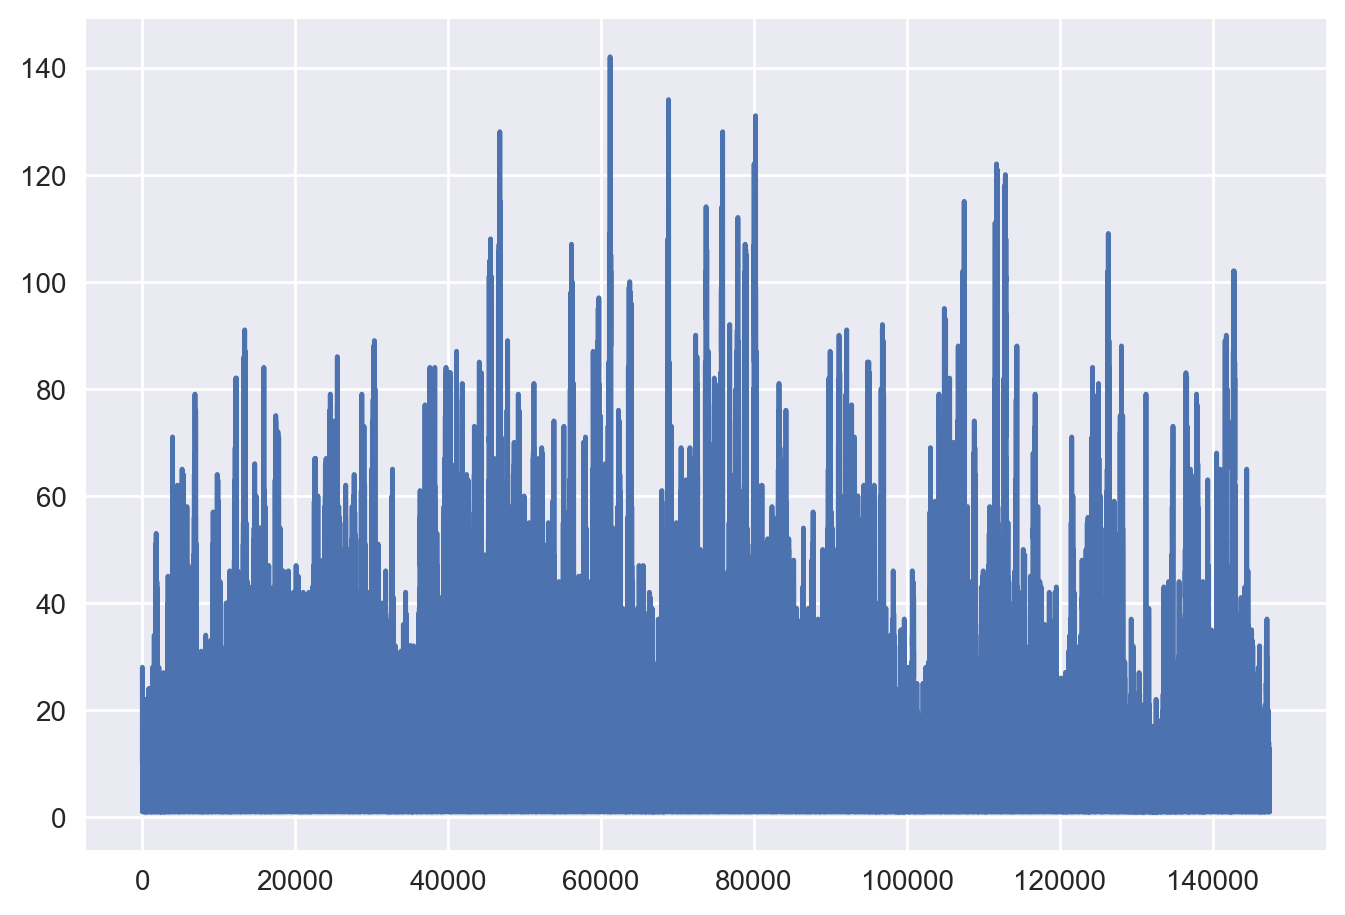

In [92]:
plt.figure(dpi=200)
df_weather.Count_Trips.plot()

In [93]:
print(df_weather.Count_Trips.std())
print(df_weather.Count_Trips.diff().std()) 
print(df_weather.Count_Trips.diff().diff().std())
print(df_weather.Count_Trips.diff().diff().diff().std())

14.91918256440444
5.687013518029959
9.558397959278853
17.3919855501549


Figure(1600x1100)
Figure(1600x1100)


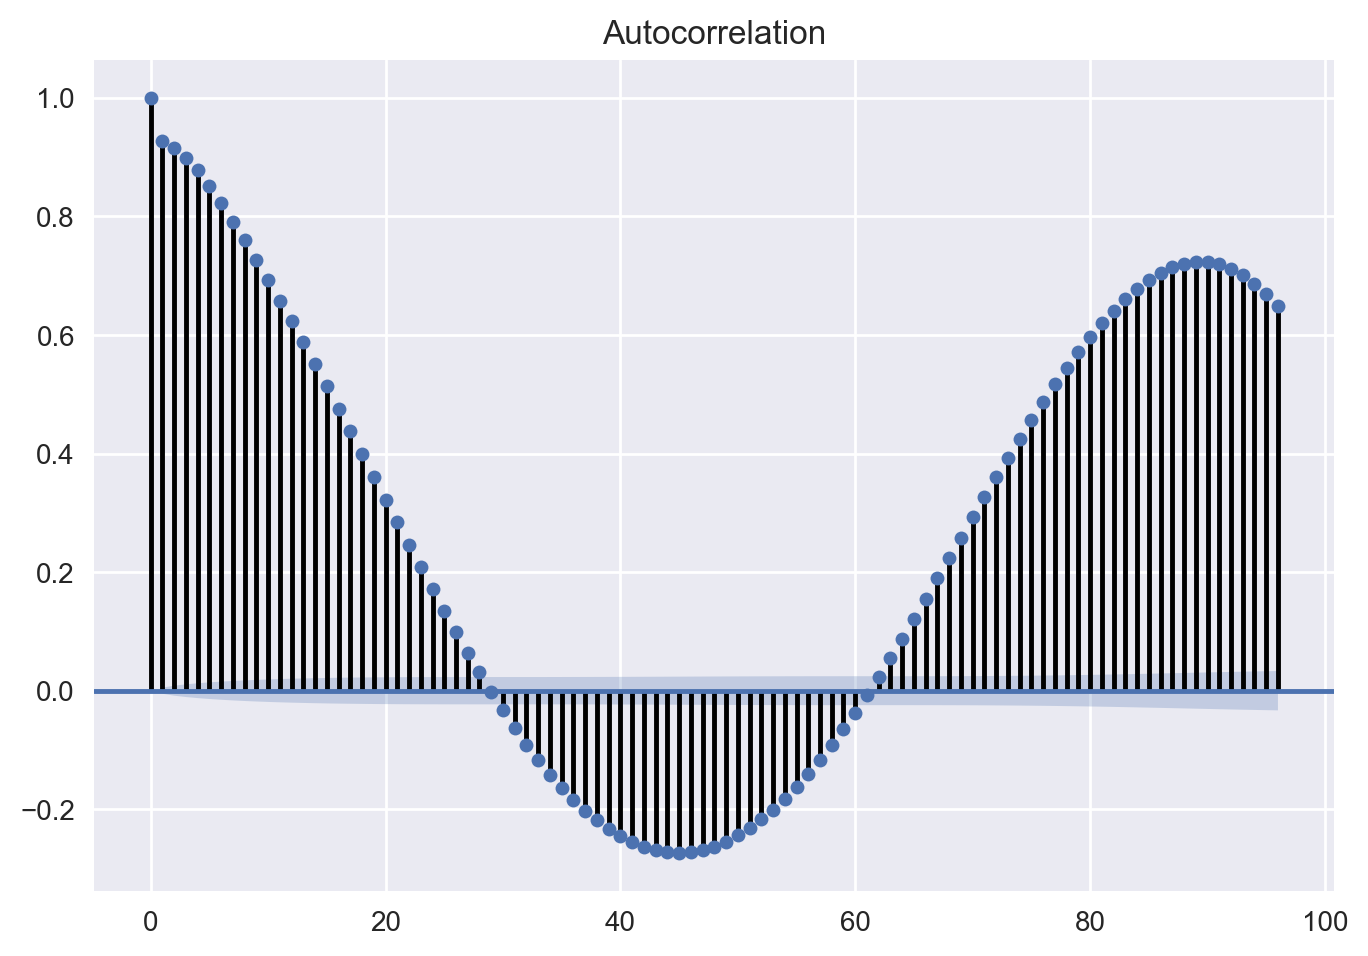

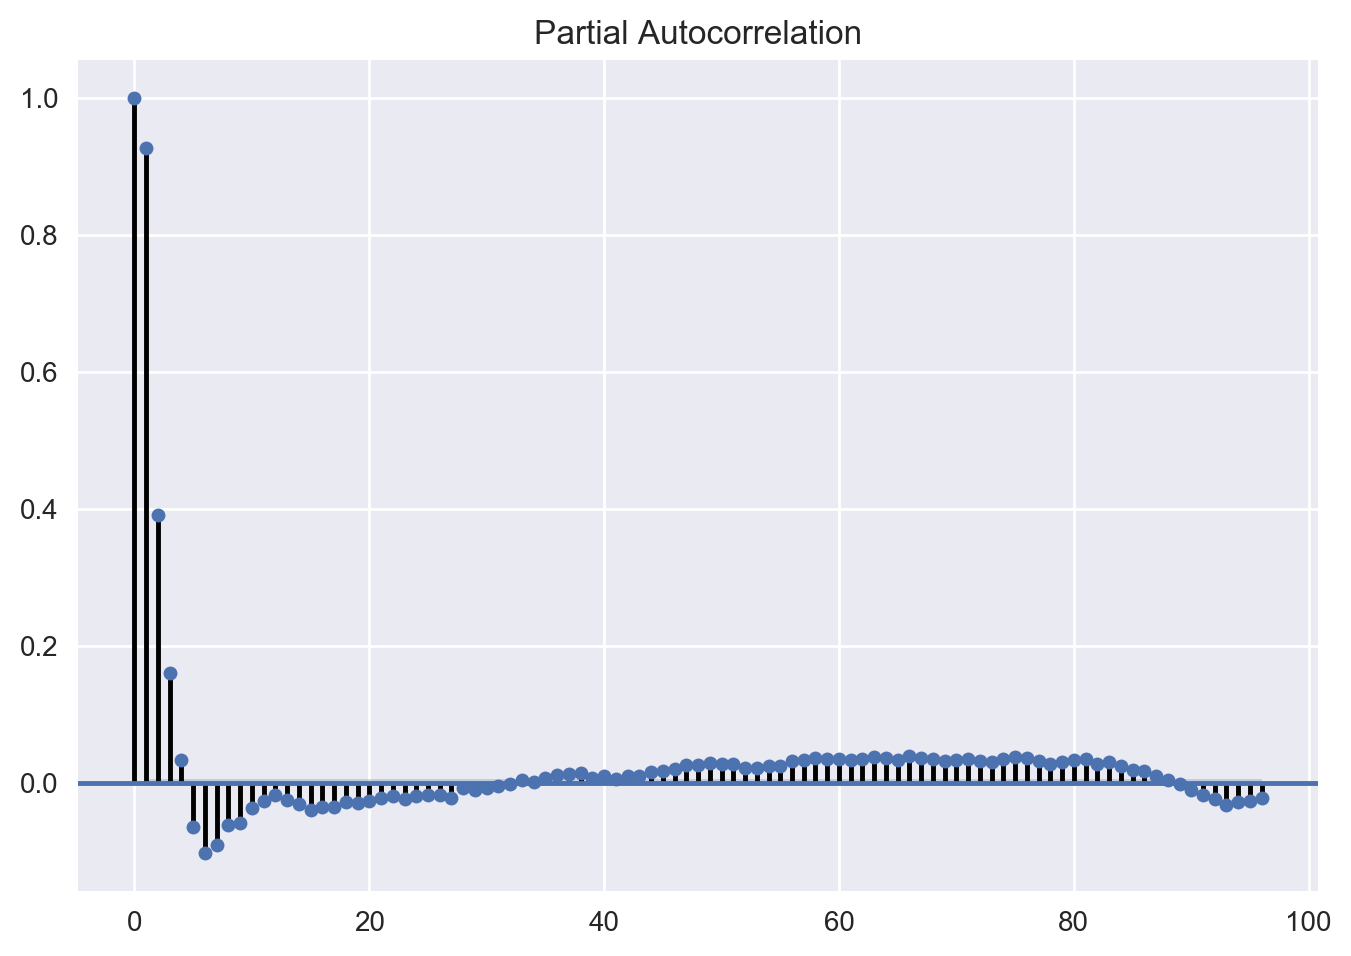

In [94]:
fig = plt.figure(dpi=200)
ax = plt.gca()
print(plot_acf(df_weather.Count_Trips, lags=4*24, ax=ax)) 
fig = plt.figure(dpi=200)
ax = plt.gca()
print(plot_pacf(df_weather.Count_Trips, lags=4*24, ax=ax))

In [95]:
# Add columns of 5 previous periods, future period, and a day prior
df_weather['L'] = df_weather.shift(1).Count_Trips
df_weather['2L'] = df_weather.shift(2).Count_Trips
df_weather['3L'] = df_weather.shift(3).Count_Trips
df_weather['4L'] = df_weather.shift(4).Count_Trips
df_weather['5L'] = df_weather.shift(5).Count_Trips
df_weather['-L'] = df_weather.shift(-1).Count_Trips
df_weather['D'] = df_weather.shift(96).Count_Trips

In [98]:
# Drop the NaN's 
df_weather.dropna(inplace=True)

In [99]:
df_weather.head(5)

,Trip_Start,Count_Trips,Trip Total,Trip Seconds,season[T.Spring],season[T.Summer],season[T.Winter],Intercept,Day[T.Monday],Day[T.Saturday],...,Temp,Humidity,Precip,L,2L,3L,4L,5L,-L,D
96,2013-01-02 01:15:00,2,10.750000,510.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,9.0,70.000000,0.0,3.0,3.0,2.0,1.0,5.0,1.0,10.0
97,2013-01-02 01:30:00,1,14.450000,840.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,9.0,71.500000,0.0,2.0,3.0,3.0,2.0,1.0,1.0,20.0
98,2013-01-02 01:45:00,1,10.650000,600.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,9.0,73.000000,0.0,1.0,2.0,3.0,3.0,2.0,7.0,11.0
99,2013-01-02 02:00:00,7,7.507143,377.142857,0.0,0.0,1.0,1.0,0.0,0.0,...,9.0,72.666667,0.0,1.0,1.0,2.0,3.0,3.0,1.0,15.0
100,2013-01-02 02:15:00,1,11.650000,600.000000,0.0,0.0,1.0,1.0,0.0,0.0,...,9.0,72.333333,0.0,7.0,1.0,1.0,2.0,3.0,3.0,18.0


In [157]:
df_weather.to_pickle('TimeSeries.pkl')

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [105]:
df_weather.set_index('Trip_Start',inplace=True)

In [127]:
df_weather.drop(columns = {'Intercept','DateTime'},inplace=True)

In [128]:
df_weather.columns

Index(['Count_Trips', 'Trip Total', 'Trip Seconds', 'season[T.Spring]',
       'season[T.Summer]', 'season[T.Winter]', 'Day[T.Monday]',
       'Day[T.Saturday]', 'Day[T.Sunday]', 'Day[T.Thursday]', 'Day[T.Tuesday]',
       'Day[T.Wednesday]', 'Vis', 'Temp', 'Humidity', 'Precip', 'L', '2L',
       '3L', '4L', '5L', '-L', 'D'],
      dtype='object')

## Build a model on total dollar

In [57]:
y2 = df_analysis['Trip Total']
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2, random_state=42)

In [58]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
ym_predict = model2.predict(X_test_scaled)

In [60]:
print("RSquared Score is: ", str(model2.score(X_train_scaled,y2_train)))

RSquared Score is:  0.0530177054654255


In [61]:
model2.score(X_test_scaled, y2_test)

0.09380834764315171

In [62]:
print("The training score is: " + str(sum(train_scores(model2)["train"])/len(train_scores(model2)["train"])))

The training score is: -16.17642556869336


In [63]:
np.sqrt(mean_squared_error(y2_test, ym_predict))

3.8346274281791253

In [5]:
# open the pickle file
with open ('Weather_updated.pkl', 'rb') as file:
    weather = pickle.load(file)

In [73]:
weather.rename(columns = {'DateTime':'Time'},inplace=True)

In [77]:
weather.head(5)

,DateTime,Vis,Temp,Humidity,Precip
0,2013-01-01 00:45:00,10.0,17.00,62.0,0.0
1,2013-01-01 01:00:00,10.0,16.75,62.0,0.0
2,2013-01-01 01:15:00,10.0,16.50,62.0,0.0
3,2013-01-01 01:30:00,10.0,16.25,62.0,0.0
4,2013-01-01 01:45:00,10.0,16.00,62.0,0.0


In [76]:
weather = weather.reset_index()